## ANKIT
## Machine learning Internship of Bharat Intern 
## TASK 1:- House Price Prediction

In [1]:
# IMPORTING TKE REQUIRED LIBRARIES:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTING THE DATASET :

df = pd.read_csv("Housing.csv")

In [3]:
# it is  used to select first 20 row of the dataset

df.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
#it is used to select all columns of the dataset:

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
# it is define the size of the dataset:

df.shape

(545, 13)

**As we can see our dataset has 545 rows and 13 columns.**

In [6]:
# it is define the datatypes of columns of the dataset:

df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

 ## Data processing:

In [7]:
#Checkig for the null values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# it is remova of duplicate values

counter = 0
rs,cs = df.shape
df.drop_duplicates(inplace=True)
if df.shape==(rs,cs):
    print("Inference: The dataset doesn't have any duplicate")
else :
    print("Inference: Number of duplicates dropped/fixed")

Inference: The dataset doesn't have any duplicate


**No null values present our dataset.**

In [9]:
# Converting all our categorical data columns to numeric form

from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
le = LabelEncoder()
df[categ]= df[categ].apply(le.fit_transform)

In [10]:
# After converting our dataset looks this:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<Axes: >

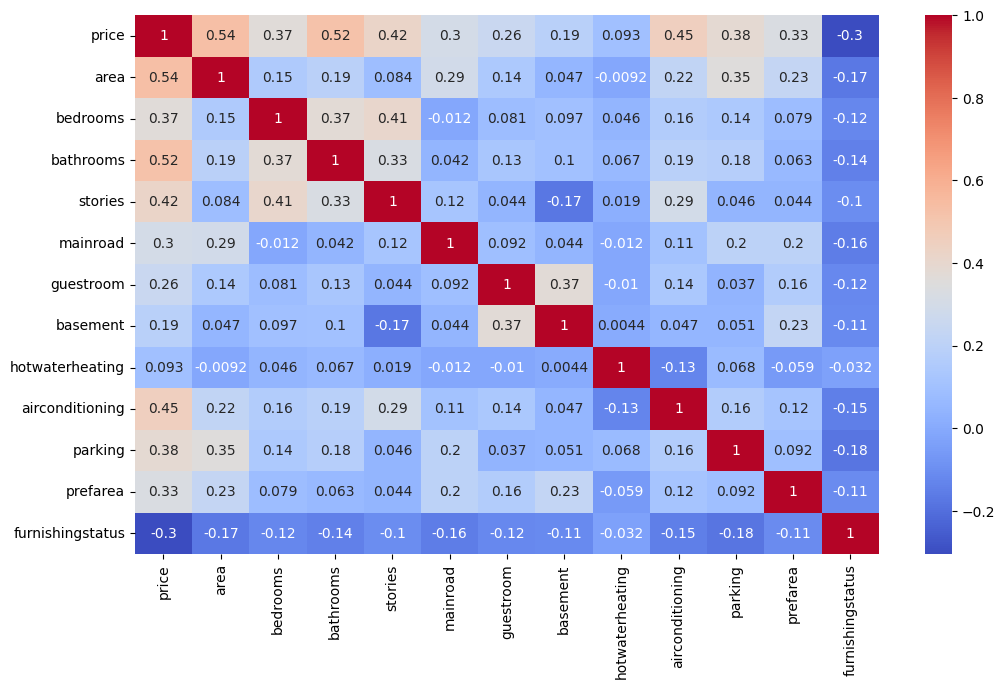

In [11]:
# CORRELATION BETWEEN THE COLUMNS
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm', annot = True)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


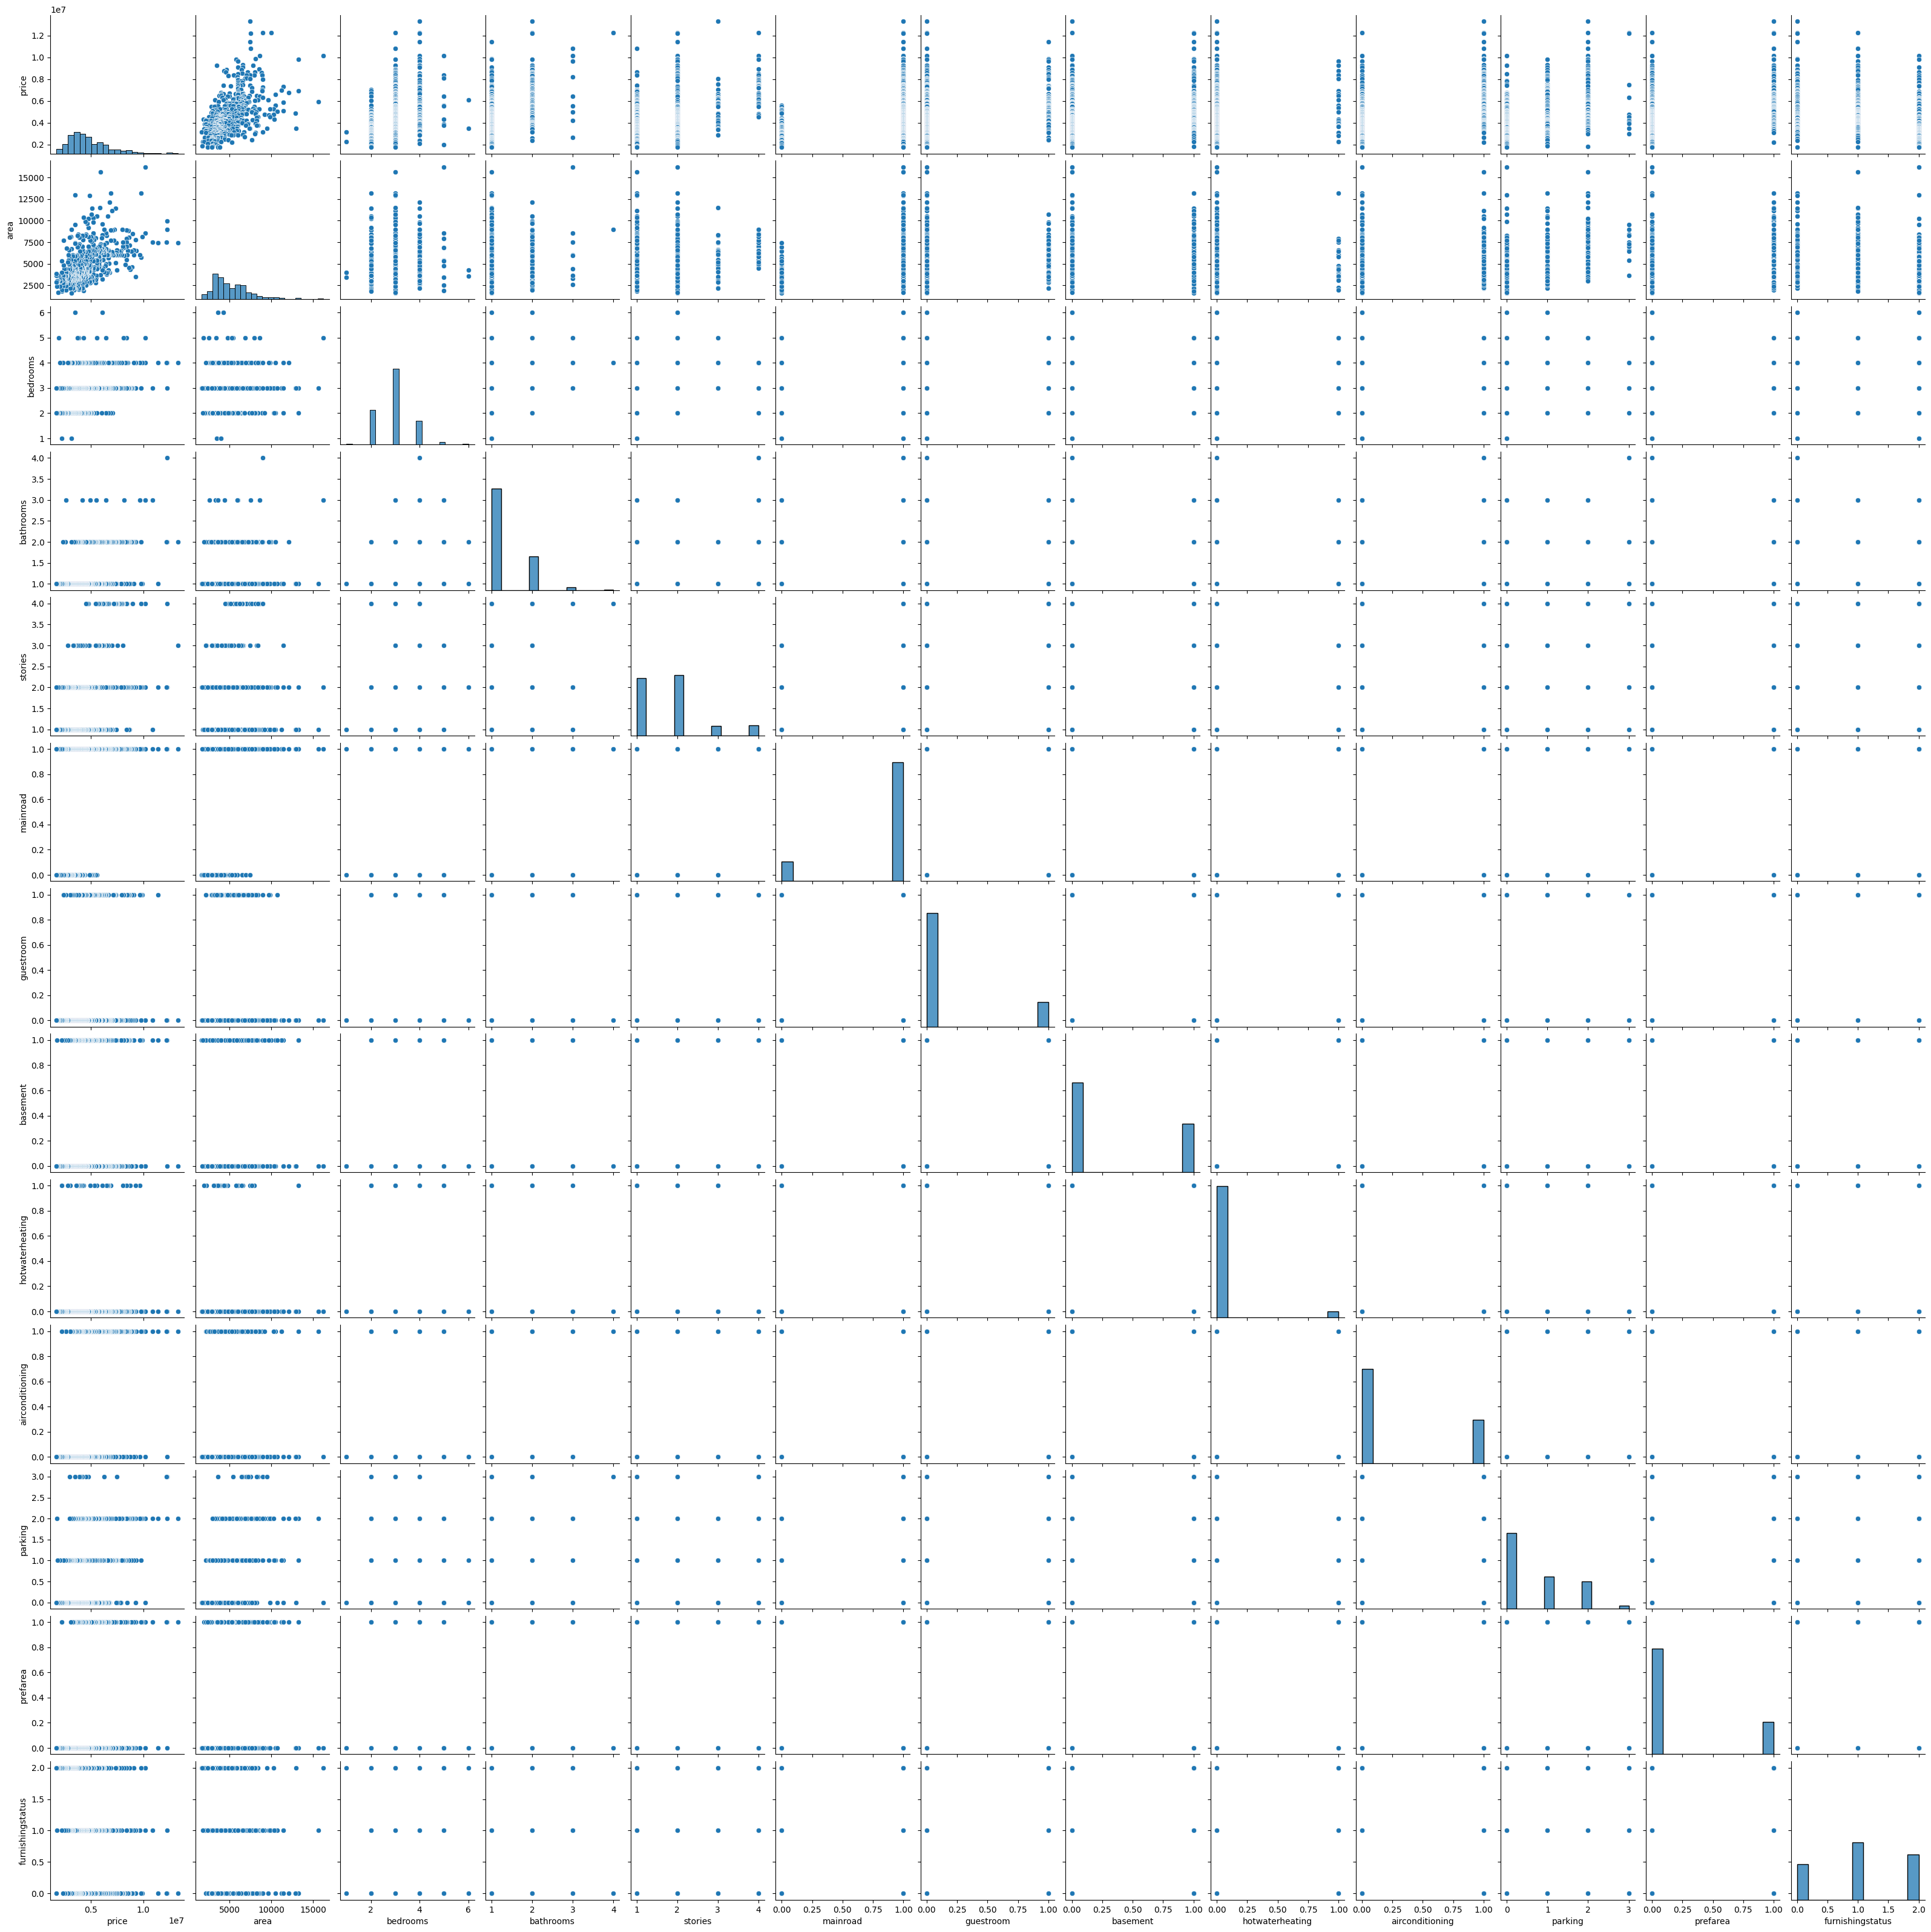

In [12]:
sns.pairplot(df)

# Spliting The Dataset :

In [13]:
x = df.drop(['price'],axis = 1)
y = df['price']

In [14]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [15]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3,random_state=42)

In [17]:
len(x_train),len(x_test)

(381, 164)

<Axes: >

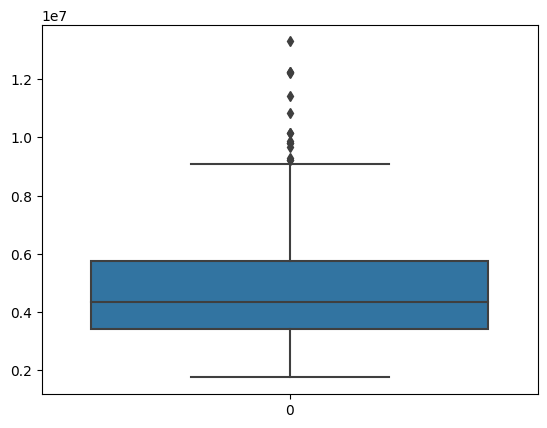

In [18]:
sns.boxplot(df['price'])

# Linear Regression :

In [19]:
# IMPORTING THE MODULE

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# FITTING THE DATA INTO THE MODEL

model.fit(x_train,y_train)

LinearRegression()

In [21]:
# PREDICTING THE OUTCOMES

y_predict = model.predict(x_test)

In [22]:
y_predict

array([5407508.87024418, 7097185.46706855, 3055462.44314053,
       4476945.19636315, 3315983.65663579, 3618373.03255259,
       5758111.46044028, 6466502.43909126, 2830273.16469119,
       2588804.65810567, 9649589.31414054, 2830606.51113843,
       3048137.62898116, 3392779.60203048, 3823232.9673009 ,
       5358170.87034031, 2955016.41578148, 4836054.53230682,
       4603068.47740645, 3551464.60674927, 5625018.82657786,
       5796938.54363456, 2758483.74755246, 4873266.20950521,
       5600804.93370716, 7772078.63540938, 3381536.16270183,
       5370732.06725796, 8352665.9587942 , 3406110.06934798,
       6335677.41367624, 3427228.10570008, 6740746.88053742,
       4205633.93578768, 3624702.80095917, 5797171.46441145,
       5080025.13346592, 4386055.52335342, 3070137.54474224,
       4635050.40917587, 4743419.55702887, 3433682.48420934,
       7076940.4807988 , 4096598.07073101, 3741261.35302813,
       4308416.36745432, 6678982.6364043 , 4092649.04459023,
       3872211.05471678,

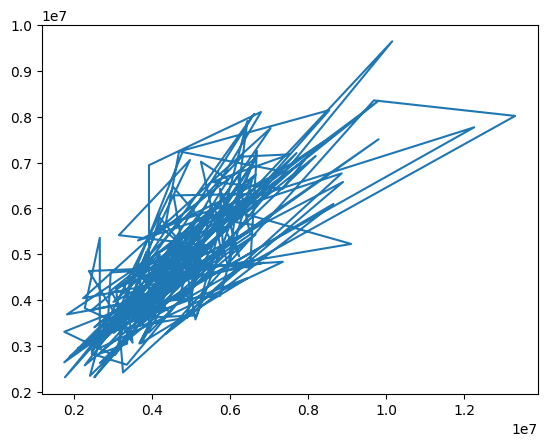

In [23]:
plt.plot(y_test,y_predict)
plt.show()

# Model  Evaluation metrics


In [24]:
from sklearn import metrics
#different type errors

print('MAE:', metrics.mean_absolute_error(y_test, y_predict)) 
print('MSE:', metrics.mean_squared_error(y_test, y_predict)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict))) 

MAE: 925543.548315656
MSE: 1535047758428.0498
RMSE: 1238970.4429194627


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test , y_predict)

0.6435419628959107

Text(0, 0.5, 'y_predict')

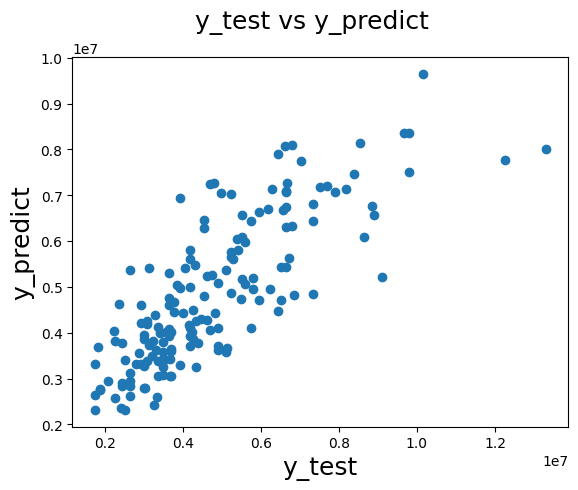

In [26]:
fig = plt.figure()
plt.scatter(y_test,y_predict)
fig.suptitle('y_test vs y_predict' ,fontsize=18)
plt.xlabel('y_test' ,fontsize=18)
plt.ylabel('y_predict' ,fontsize=18)